In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Reading the dataset
data_wine = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Dataset information
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

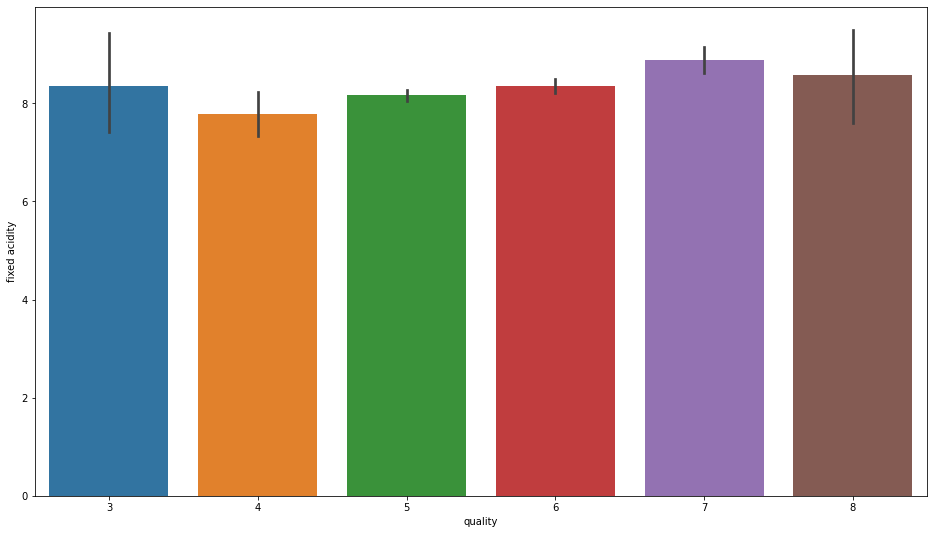

In [4]:
# Visualizing quality distribution
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

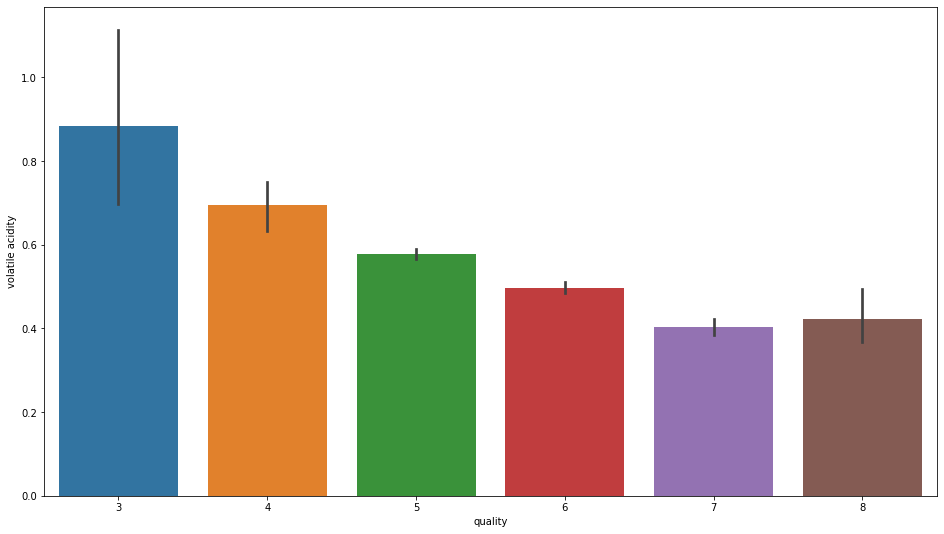

In [5]:
# Preprocessing the target variable
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

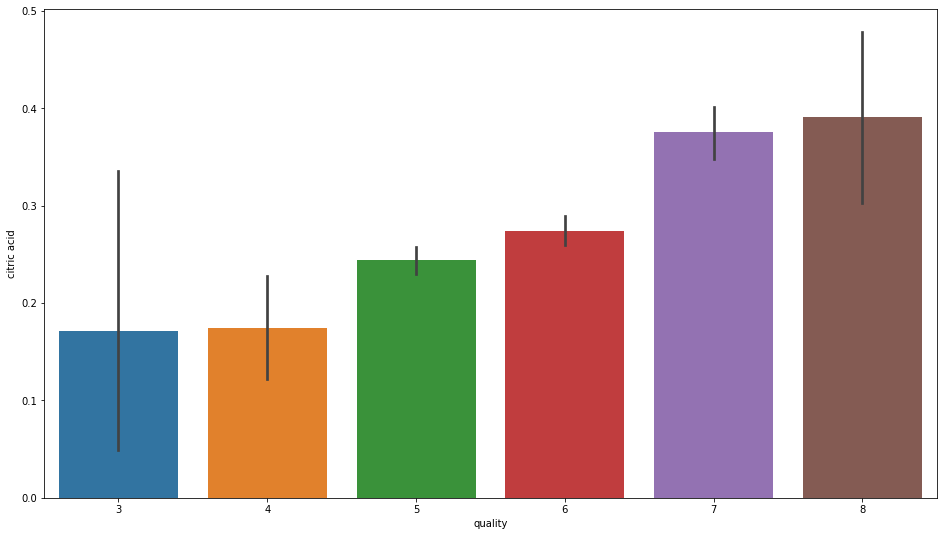

In [6]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'citric acid', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

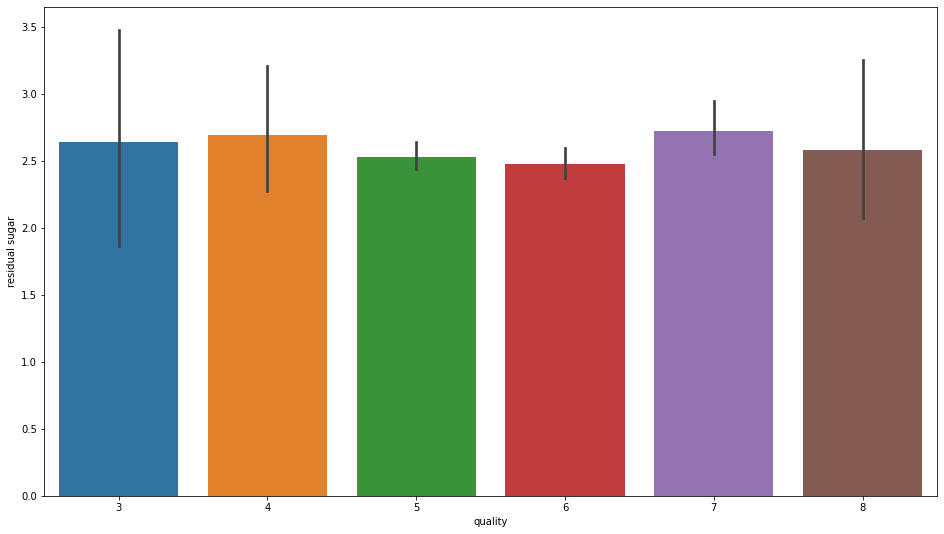

In [7]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'residual sugar', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

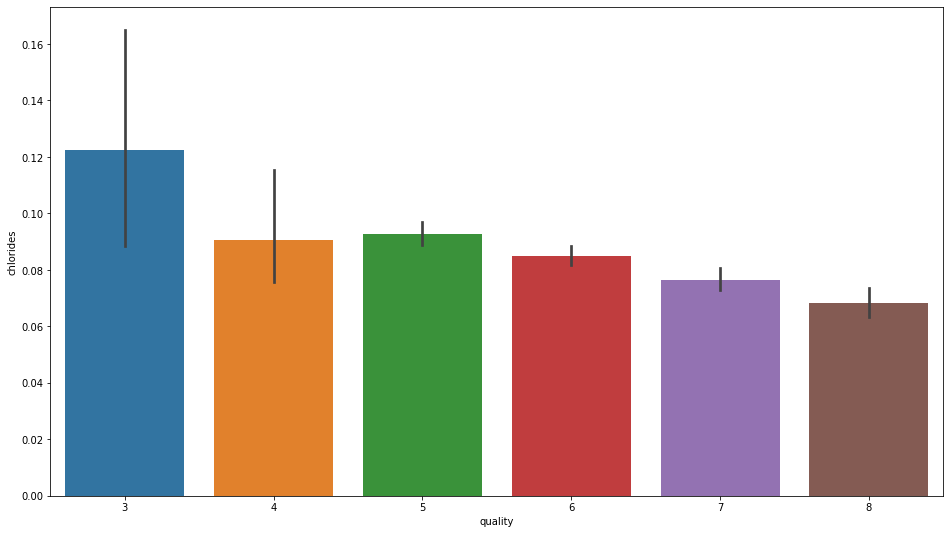

In [8]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'chlorides', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

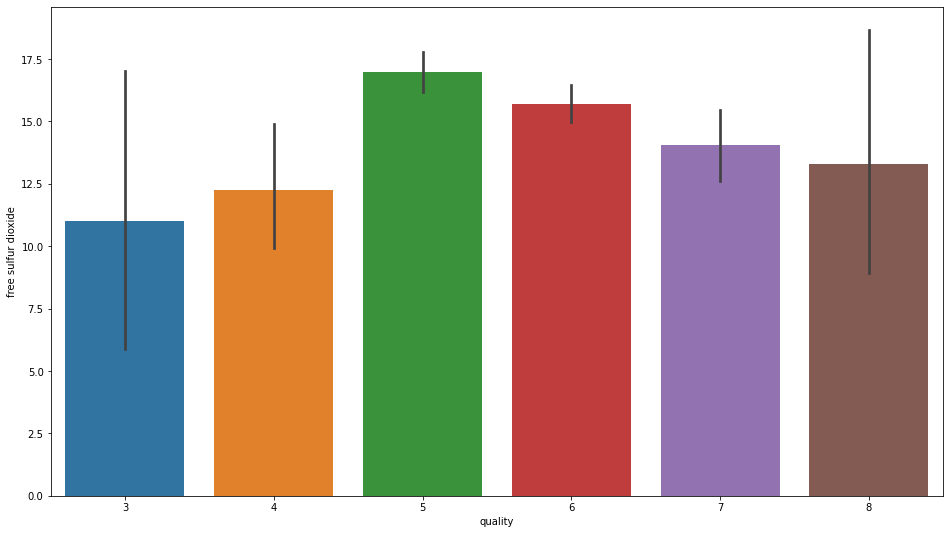

In [9]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

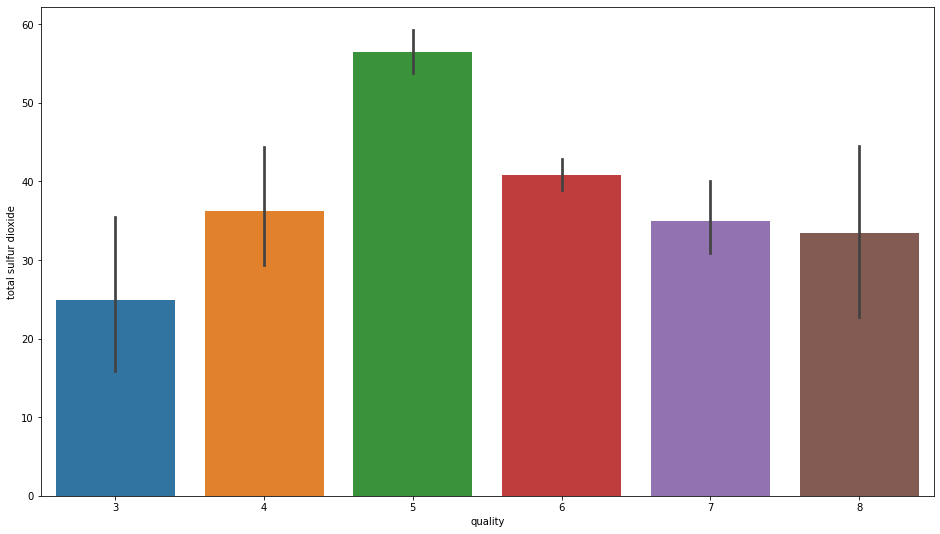

In [10]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

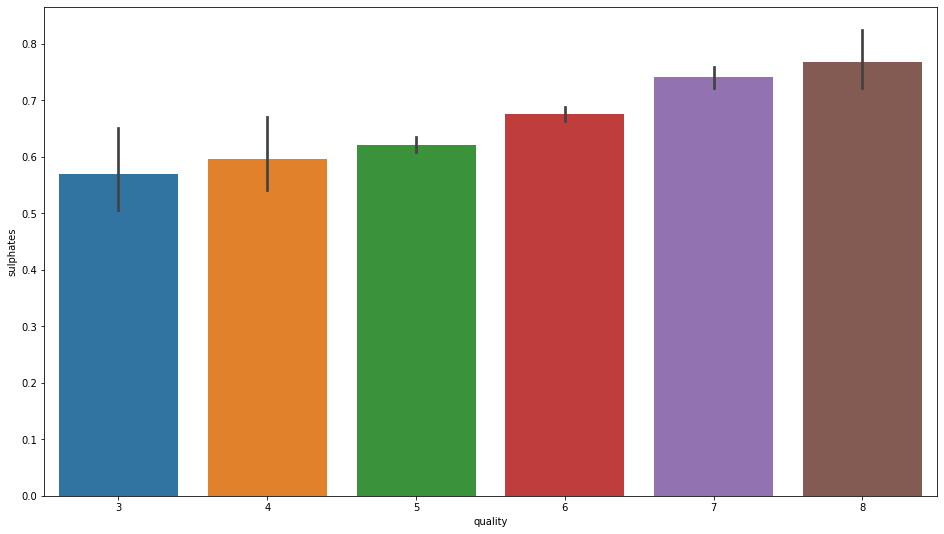

In [11]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'sulphates', data = data_wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

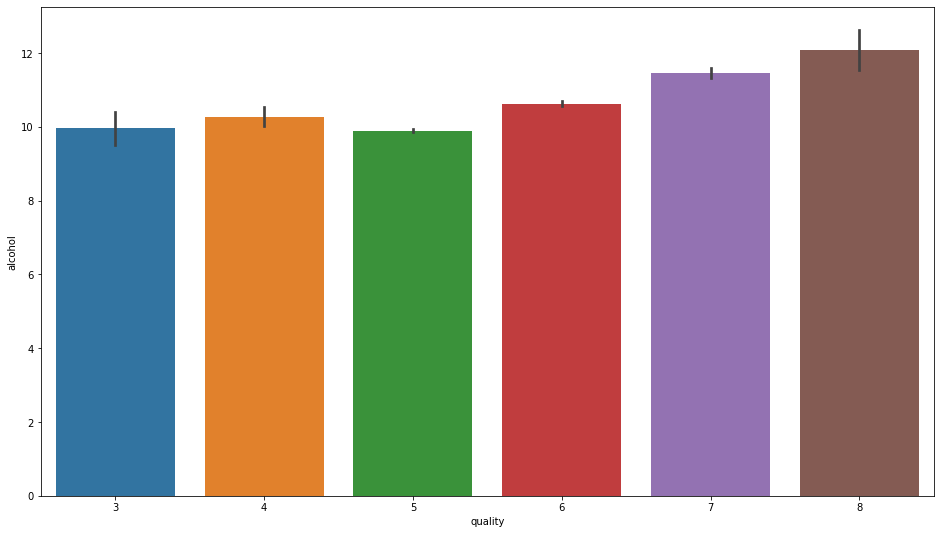

In [12]:
figure = plt.figure(figsize= (16,9))
sns.barplot(x = 'quality', y = 'alcohol', data = data_wine)

In [13]:
# Preprocessing the target variable
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data_wine['quality'] = pd.cut(data_wine['quality'], bins = bins, labels = group_names)

In [14]:
label_quality = LabelEncoder()

In [15]:
data_wine['quality'] = label_quality.fit_transform(data_wine['quality'])

In [16]:
data_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

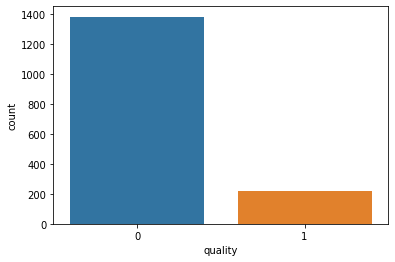

In [17]:
sns.countplot(data_wine['quality'])

In [18]:
# Data preprocessing
X = data_wine.drop('quality', axis = 1)
y = data_wine['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [23]:
# Classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       273
           1       0.73      0.34      0.46        47

    accuracy                           0.88       320
   macro avg       0.81      0.66      0.70       320
weighted avg       0.87      0.88      0.87       320



In [24]:
# Confusion matrix
print(confusion_matrix(y_test, pred_rfc))

[[267   6]
 [ 31  16]]
